# **Data Generation**

### **Parameters**

In [ ]:
import numpy as np


In [ ]:
# Paramètres
S0 = 100.0  # Prix initial de l'actif
K = 100.0  # Prix d'exercice
T = 1  # Maturité
sigma = 0.4  # Volatilité
rho = 0.75  # Corrélation
nbsj = 10  # Nombre de sous-jacents
r = 0.05  # Taux d'intérêt sans risque
weights = np.ones(nbsj) * (1 / nbsj)

S0 = np.ones(nbsj)*S0

# Poids du panier
omega = np.ones(nbsj) / nbsj

# Matrice de corrélation
rho = np.full((nbsj, nbsj), rho)
np.fill_diagonal(rho, 1)

# Matrice de volatilité
sigma = np.ones(nbsj)*sigma


M = 1000

## **Data for the neural network**

In [ ]:
def f_payoff_call_on_a_basket(Z,S0, K, T, r, sigma, rho, weights):

    L = np.linalg.cholesky(rho)
    Z = np.sqrt(T) * Z
    Z = np.einsum('ij, kj->ki', L, Z)
    # Simulate the final stock prices
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * Z)

    # Calculate the payoff
    ST_weighted_sum = np.sum(weights * ST, axis=1)
    payoff = np.maximum(ST_weighted_sum - K, 0.0)

    return payoff

def g_payoff_put_on_a_worst(Z,S0, K, T, r, sigma, rho,weights):
    L = np.linalg.cholesky(rho)
    Z = np.sqrt(T) * Z
    Z = np.einsum('ij, kj->ki', L, Z)
    # Simulate the final stock prices
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * Z)

    # Calculate the payoff
    minST = np.min(ST, axis=1)
    payoff = np.maximum(K-minST, 0.0)
    return payoff

### other payoff

###
def Z_normal_sample(S0,M):
    # Number of assets
    num_assets = len(S0)
    # Correlated Brownian motions
    dB = np.random.normal(size=(M, num_assets))
    return dB

In [ ]:
Z = Z_normal_sample(S0, M)
f_Z = f_payoff_call_on_a_basket(Z,S0, K, T, r, sigma, rho, omega)
f_Z

array([0.00000000e+00, 3.64171665e+01, 0.00000000e+00, 0.00000000e+00,
       4.11330501e+01, 4.50208879e+01, 5.22314094e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.29884281e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.70585123e+00, 1.27147239e+01,
       1.91162456e+01, 0.00000000e+00, 2.67537650e+01, 1.02038499e+02,
       1.30473527e+01, 5.15084232e+00, 3.44946880e+01, 0.00000000e+00,
       0.00000000e+00, 4.21564310e+01, 0.00000000e+00, 3.19251951e+01,
       0.00000000e+00, 4.00320591e+01, 2.18913494e+01, 3.07930663e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.75620857e+01, 0.00000000e+00,
       2.27189245e+00, 6.86962323e+01, 7.55151329e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.38156269e+00,
       0.00000000e+00, 7.02917744e+00, 0.00000000e+00, 0.00000000e+00,
       1.88403894e+01, 0.00000000e+00, 1.46048309e+01, 1.01403908e+01,
      

In [ ]:
g_Z = g_payoff_put_on_a_worst(Z,S0, K, T, r, sigma, rho,M)
g_Z


array([3.03500054e+01, 6.42803256e+00, 3.53934754e+01, 4.65580996e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.47483848e+01,
       6.31761394e+01, 5.17729850e+01, 0.00000000e+00, 3.87472520e+01,
       4.17609817e+01, 4.56053226e+01, 2.03791592e+01, 7.64222380e+00,
       0.00000000e+00, 4.49694183e+01, 1.93138031e+01, 0.00000000e+00,
       1.76495104e+01, 2.77870016e+01, 0.00000000e+00, 4.78630584e+01,
       4.92456277e+01, 3.14428005e+01, 3.54348507e+01, 1.03116968e+01,
       3.95506770e+01, 3.93696942e+00, 8.47631371e+00, 1.20670717e+01,
       6.12989840e+01, 3.90196104e+01, 4.28989431e+01, 5.33803861e+01,
       3.71183116e+01, 2.53569652e+01, 2.44642469e+00, 4.41536111e+01,
       3.59372729e+01, 0.00000000e+00, 0.00000000e+00, 4.05714086e+01,
       2.95673722e+01, 5.09158457e+01, 4.56367955e+01, 2.56815229e+01,
       2.35233203e+01, 3.59284866e+01, 6.36670868e+01, 2.09941577e+01,
       1.86230342e+01, 4.39817613e+01, 3.09925645e+01, 3.27136531e+01,
      

# **Monte carlo naif**

In [ ]:
import numpy as np

def black_scholes_Monte_Carlo_option(f_Z,r,T,M):

    # Discount the payoff to get the option price
    C0 = np.exp(-r*T) * np.mean(f_Z)
    sigma = np.sqrt( np.sum( (f_Z - C0)**2) / (M-1) ) # standart deviation
    accuracy = sigma/np.sqrt(M)
    return C0,1.96*accuracy,sigma**2


In [ ]:
call_basket_naive = black_scholes_Monte_Carlo_option(f_Z,r,T,M)
call_basket_naive

(17.848225264700048, 1.9246309628643206, 964.2347832195027)

In [ ]:
put_worst_naive = black_scholes_Monte_Carlo_option(g_Z,r,T,M)
put_worst_naive

(25.727278792613816, 1.2528780183505765, 408.6066557856277)

# Numerical integration

In [ ]:
import torch
from torch import nn

class DimensionReductionNetwork(nn.Module):
    def __init__(self, N, n, hidden_layers):
        super(DimensionReductionNetwork, self).__init__()
        # Dimension reduction cell
        self.a1 = nn.Linear(N, n, bias=False)

        # The rest of the layers
        layers = []
        input_dim = n
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.ReLU())
            input_dim = hidden_dim
        layers.append(nn.Linear(input_dim, 1))  # Output layer
        self.H_tilde = nn.Sequential(*layers)

    def forward(self, Z):
        Z_tilde = self.a1(Z)
        output = self.H_tilde(Z_tilde)
        return output


In [ ]:
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [ ]:
import torch
import numpy as np
import scipy.stats as sps
from scipy.stats import multivariate_normal
from scipy.linalg import cholesky
def density_function_times_H_tilde(x, model):
    # Convert x to a tensor if it's not already
    if not isinstance(x, torch.Tensor):
        x_tensor = torch.tensor([x]).float()
    else:
        x_tensor = x

    # Compute H_tilde(Z_tilde)
    H_tilde_Z_tilde = model.H_tilde(x_tensor)

    # Compute the weight matrix W
    W = model.a1.weight.data.cpu().numpy()

    # Compute the density function of Z˜, which is N(0, WWT)
    variance = W@W.T
    pdf_value = sps.norm.pdf(x, loc=0, scale=np.sqrt(variance))

    return H_tilde_Z_tilde.detach().cpu().numpy() * pdf_value



In [ ]:
from scipy import integrate
def new_variable(f_Z,model,Z):
  # Compute the expected value of H_tilde(Z) using the rectangle method
  mean_control_variate =  integrate.quad(lambda x: density_function_times_H_tilde(x, model), -np.inf, np.inf)[0]
  control_variate = model(torch.tensor(Z).float()).detach().cpu().numpy()
  return f_Z - control_variate + mean_control_variate

In [ ]:
def Option_Price_Monte_Carlo_Estimator_with_control_variate_numerical_integration(f_Z,Z,K,r,T,M):

  # Initialize the network with N input features, n=1 unit in the dimension reduction cell,
  # and a list of hidden layer sizes for the second part of the network.

  Z_tr = torch.tensor(Z, dtype=torch.float32).to(device)
  y_tr = torch.tensor(f_Z, dtype=torch.float32).to(device)

  N = nbsj  # Number of input features
  n = 1  # Number of units in the dimension reduction cell
  hidden_layers = [100,200,10]  # Sizes of hidden layers in the second part of the network
  model = DimensionReductionNetwork(N, n, hidden_layers).to(device)
  dataset = TensorDataset(Z_tr, y_tr)
  batch_size = 64
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

  # Use mean squared error loss
  criterion = nn.MSELoss()

  # Use Adam optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  # Number of epochs
  epochs = 200

  # List to store average losses for each epoch
  avg_losses = []
  model.train()
  for epoch in range(epochs):
      epoch_losses = []  # List to store losses for this epoch

      for Z_batch, y_batch in dataloader:
          # Move the data to the GPU
          Z_batch, y_batch = Z_batch.to(device), y_batch.to(device)

          # Forward pass
          outputs = model(Z_batch)
          loss = criterion(outputs.squeeze(), y_batch)

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          # Store the loss for this batch
          epoch_losses.append(loss.item())

      # Compute the average loss for this epoch
      avg_loss = sum(epoch_losses) / len(epoch_losses)

      # Store the average loss for this epoch
      avg_losses.append(avg_loss)

      # Print the average loss for this epoch
      print(f'Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}')

  # After training, plot the average losses
  plt.plot(avg_losses)
  plt.xlabel('Epoch')
  plt.ylabel('Average Loss')
  plt.title('Training Loss')
  plt.show()

  mean_control_variate =  integrate.quad(lambda x: density_function_times_H_tilde(x, model), -np.inf, np.inf,limit = 10000)[0]
  control_variate = model(Z_tr).data.cpu().numpy().flatten()
  new_payoff = f_Z - control_variate + mean_control_variate
  C0 = np.exp(-r*T)*np.sum(new_payoff)/M
  sigma = np.sqrt( np.sum( (new_payoff - C0)**2) / (M-1) ) # standart deviation
  accuracy = sigma/np.sqrt(M)
  return C0,1.96*accuracy,sigma**2

Epoch 1/200, Average Loss: 1296.8984355926514
Epoch 2/200, Average Loss: 1220.452651977539
Epoch 3/200, Average Loss: 1095.8902969360352
Epoch 4/200, Average Loss: 954.2756366729736
Epoch 5/200, Average Loss: 895.1584091186523
Epoch 6/200, Average Loss: 886.0342693328857
Epoch 7/200, Average Loss: 838.4876461029053
Epoch 8/200, Average Loss: 803.0157794952393
Epoch 9/200, Average Loss: 771.0697784423828
Epoch 10/200, Average Loss: 730.369794845581
Epoch 11/200, Average Loss: 690.3591785430908
Epoch 12/200, Average Loss: 666.015209197998
Epoch 13/200, Average Loss: 607.5359344482422
Epoch 14/200, Average Loss: 563.4827136993408
Epoch 15/200, Average Loss: 508.1157703399658
Epoch 16/200, Average Loss: 459.5128116607666
Epoch 17/200, Average Loss: 397.1586103439331
Epoch 18/200, Average Loss: 331.9549732208252
Epoch 19/200, Average Loss: 265.5353832244873
Epoch 20/200, Average Loss: 200.69529342651367
Epoch 21/200, Average Loss: 141.7901725769043
Epoch 22/200, Average Loss: 90.67695927619

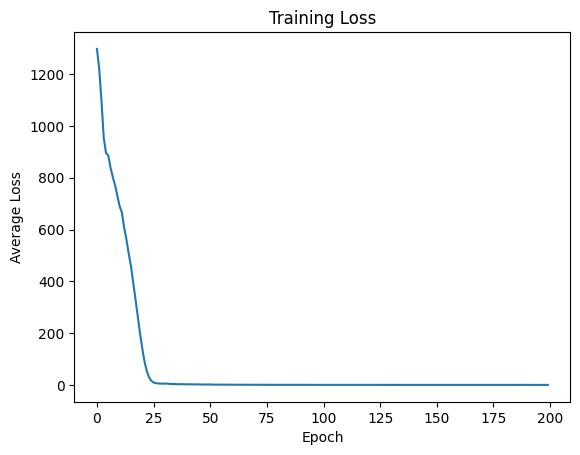

<ipython-input-13-0f109db3034f>:64: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  mean_control_variate =  integrate.quad(lambda x: density_function_times_H_tilde(x, model), -np.inf, np.inf,limit = 10000)[0]


(16.213453984047327, 0.07564126510968734, 1.4893796822662442)

In [ ]:
call_basket_numerical_integration = Option_Price_Monte_Carlo_Estimator_with_control_variate_numerical_integration(f_Z,Z,K,r,T,M)
call_basket_numerical_integration

Epoch 1/200, Average Loss: 1124.8218421936035
Epoch 2/200, Average Loss: 1008.8271865844727
Epoch 3/200, Average Loss: 785.6586723327637
Epoch 4/200, Average Loss: 516.3172912597656
Epoch 5/200, Average Loss: 404.8728942871094
Epoch 6/200, Average Loss: 401.0101718902588
Epoch 7/200, Average Loss: 391.40949630737305
Epoch 8/200, Average Loss: 373.1558656692505
Epoch 9/200, Average Loss: 365.1968116760254
Epoch 10/200, Average Loss: 342.1478023529053
Epoch 11/200, Average Loss: 323.8007755279541
Epoch 12/200, Average Loss: 296.7985963821411
Epoch 13/200, Average Loss: 272.6386833190918
Epoch 14/200, Average Loss: 244.1567668914795
Epoch 15/200, Average Loss: 213.08869171142578
Epoch 16/200, Average Loss: 182.97901439666748
Epoch 17/200, Average Loss: 148.2921748161316
Epoch 18/200, Average Loss: 118.68142652511597
Epoch 19/200, Average Loss: 88.93781065940857
Epoch 20/200, Average Loss: 67.9512619972229
Epoch 21/200, Average Loss: 53.28694200515747
Epoch 22/200, Average Loss: 45.0430417

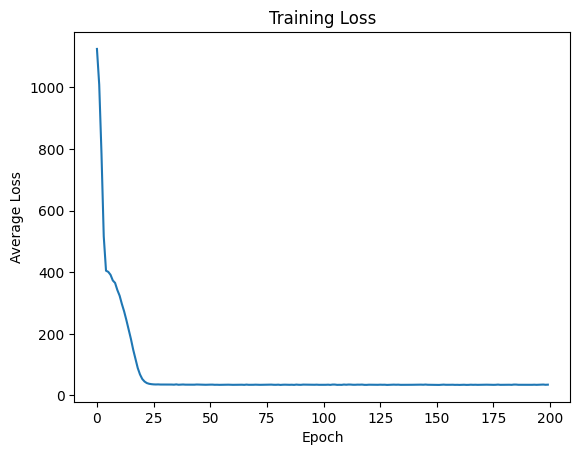

<ipython-input-13-0f109db3034f>:64: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  mean_control_variate =  integrate.quad(lambda x: density_function_times_H_tilde(x, model), -np.inf, np.inf,limit = 10000)[0]


(26.459626711069244, 0.3732097131784513, 36.257155875349305)

In [ ]:
put_worst_numerical_integration = Option_Price_Monte_Carlo_Estimator_with_control_variate_numerical_integration(g_Z,Z,K,r,T,M)
put_worst_numerical_integration

# Analytic integration

In [ ]:
import scipy.stats as stats
def Option_2_layers_neural_network(Z,f_Z,S0,K,r,T,M):
  Z_tr = torch.tensor(Z, dtype=torch.float32)
  y_tr = torch.tensor(f_Z, dtype=torch.float32)
  dataset = TensorDataset(Z_tr, y_tr)
  batch_size = 64
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
  N = Z_tr.shape[1]
  model = nn.Sequential(
    nn.Linear(N, 3000),
    nn.ReLU(),
    nn.Linear(3000, 1)
  )
    # Use mean squared error loss
  criterion = nn.MSELoss()

  # Use Adam optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  # Number of epochs
  epochs = 300

  # List to store average losses for each epoch
  avg_losses = []
  model.train()
  for epoch in range(epochs):
      epoch_losses = []  # List to store losses for this epoch

      for Z_batch, y_batch in dataloader:
          # Move the data to the GPU
          Z_batch, y_batch = Z_batch.to(device), y_batch.to(device)

          # Forward pass
          outputs = model(Z_batch)
          loss = criterion(outputs.squeeze(), y_batch)

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          # Store the loss for this batch
          epoch_losses.append(loss.item())

      # Compute the average loss for this epoch
      avg_loss = sum(epoch_losses) / len(epoch_losses)

      # Store the average loss for this epoch
      avg_losses.append(avg_loss)

      # Print the average loss for this epoch
      print(f'Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}')

  # After training, plot the average losses
  plt.plot(avg_losses)
  plt.xlabel('Epoch')
  plt.ylabel('Average Loss')
  plt.title('Training Loss')
  plt.show()
  H_Z = model(Z_tr).data.cpu().numpy().flatten()
  grouped_params = {}
  for name, param in model.named_parameters():
    grouped_params[name] = [param]
  W_1 = grouped_params['0.weight'][0].data.cpu().numpy()
  W_2 = grouped_params['2.weight'][0].data.cpu().numpy()
  b_1 = grouped_params['0.bias'][0].data.cpu().numpy()
  b_2 = grouped_params['2.bias'][0].data.cpu().numpy()
  mu = b_1
  sigma = np.sqrt(np.sum((W_1)**2, axis = 1))
  E_H_Z = W_2 @ ((sigma / (np.sqrt(2*np.pi))) * np.exp(-(1/2) * ((mu**2)/(sigma**2)) ) + mu * (1 - stats.norm.cdf(-mu / sigma))) + b_2
  #####

  new_payoff = f_Z - H_Z + E_H_Z
  C0 = np.exp(-r*T)*np.sum(new_payoff)/M
  sigma = np.sqrt( np.sum( (new_payoff - C0)**2) / (M-1) ) # standart deviation
  accuracy = sigma/np.sqrt(M)
  return C0,1.96*accuracy,sigma**2

Epoch 1/300, Average Loss: 1165.0289611816406
Epoch 2/300, Average Loss: 955.115701675415
Epoch 3/300, Average Loss: 761.2291717529297
Epoch 4/300, Average Loss: 609.1129112243652
Epoch 5/300, Average Loss: 478.8772430419922
Epoch 6/300, Average Loss: 365.15021896362305
Epoch 7/300, Average Loss: 286.590784072876
Epoch 8/300, Average Loss: 235.6412935256958
Epoch 9/300, Average Loss: 194.42777252197266
Epoch 10/300, Average Loss: 161.57930850982666
Epoch 11/300, Average Loss: 140.97199058532715
Epoch 12/300, Average Loss: 124.9896330833435
Epoch 13/300, Average Loss: 110.65475034713745
Epoch 14/300, Average Loss: 100.21955561637878
Epoch 15/300, Average Loss: 88.89315581321716
Epoch 16/300, Average Loss: 80.00570726394653
Epoch 17/300, Average Loss: 71.5023558139801
Epoch 18/300, Average Loss: 63.76753306388855
Epoch 19/300, Average Loss: 56.46526288986206
Epoch 20/300, Average Loss: 51.21357500553131
Epoch 21/300, Average Loss: 44.82804036140442
Epoch 22/300, Average Loss: 40.48705053

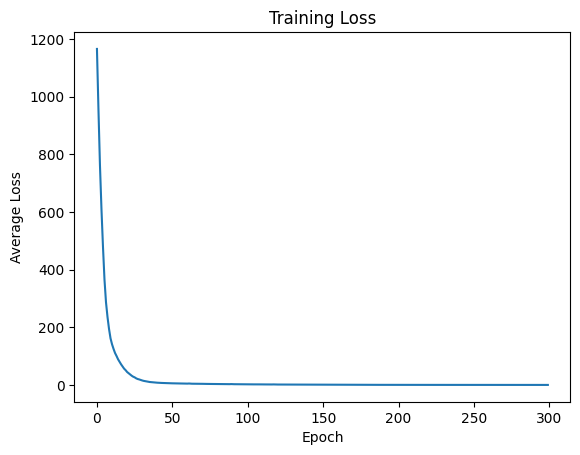

(16.251364268952145, 0.052548547471539, 0.7188020203479248)

In [ ]:
call_basket_analytic_integration = Option_2_layers_neural_network(Z,f_Z,S0,K,r,T,M)
call_basket_analytic_integration

Epoch 1/300, Average Loss: 926.5360679626465
Epoch 2/300, Average Loss: 606.5062885284424
Epoch 3/300, Average Loss: 384.79816246032715
Epoch 4/300, Average Loss: 257.6438322067261
Epoch 5/300, Average Loss: 176.81139183044434
Epoch 6/300, Average Loss: 125.07797622680664
Epoch 7/300, Average Loss: 88.6476686000824
Epoch 8/300, Average Loss: 63.84585213661194
Epoch 9/300, Average Loss: 48.00678610801697
Epoch 10/300, Average Loss: 38.73206686973572
Epoch 11/300, Average Loss: 33.83379352092743
Epoch 12/300, Average Loss: 31.155920147895813
Epoch 13/300, Average Loss: 29.848872423171997
Epoch 14/300, Average Loss: 29.36377477645874
Epoch 15/300, Average Loss: 29.247177243232727
Epoch 16/300, Average Loss: 28.691826701164246
Epoch 17/300, Average Loss: 28.115265250205994
Epoch 18/300, Average Loss: 27.916064858436584
Epoch 19/300, Average Loss: 27.44866853952408
Epoch 20/300, Average Loss: 27.467713236808777
Epoch 21/300, Average Loss: 27.23181676864624
Epoch 22/300, Average Loss: 26.834

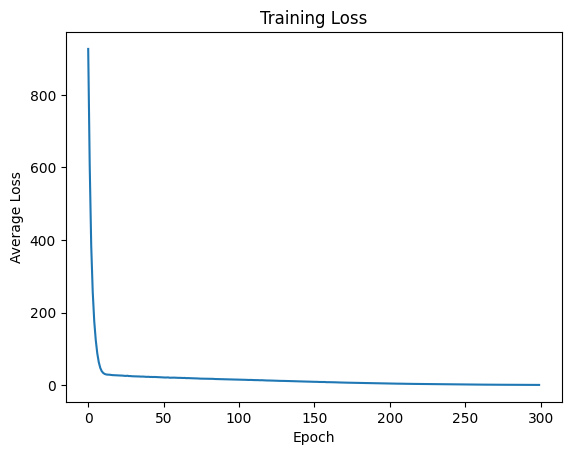

(26.647283852162662, 0.10615541491994906, 2.9334059029640107)

In [ ]:
put_worst_analytic_integration = Option_2_layers_neural_network(Z,g_Z,S0,K,r,T,M)
put_worst_analytic_integration

# Network dimension reduction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def build_model(input_dim, n_units_dim_reduction, hidden_layers_reconstruction): # Builds a neural network that reconstitutes the payoff function
    inputs = keras.Input(shape=(input_dim,), name='input_layer')
    dim_reduction = layers.Dense(n_units_dim_reduction, use_bias=False, name='dim_reduction')(inputs)
    x = dim_reduction
    for units in hidden_layers_reconstruction:
        x = layers.Dense(units, activation='relu')(x)
    output_layer = layers.Dense(1, activation='linear', name='output_layer')(x)
    model = keras.Model(inputs=inputs, outputs=output_layer, name='payoff_prediction_model')

    return model

def V_gaussian_elimination(U): # Computes a matrix V such that  Im(U) ⊕⊥ Im(V ) = R^(N)
  n,N = U.shape
  identity_matrix = np.eye(N)
  U_IN = np.concatenate((U, identity_matrix), axis=0)
  pivot_column = np.argmax(np.abs(U_IN[0, :]))
  column_0 = U_IN[:, 0]
  U_IN[:, 0] = U_IN[:, pivot_column]
  U_IN[:, pivot_column] = U_IN[:, 0]
  U_IN[:, 0] = U_IN[:, 0]/U_IN[0, 0]
  for j in range(1, N):

    U_IN[:, j] -= U_IN[:, 0] * U_IN[0, j] / U_IN[0, 0]
  zero_column_indices = np.where(~U_IN[:n,:].any(axis=0))[0]
  basis_columns_B = U_IN[n:,zero_column_indices]
  V = np.column_stack([basis_columns_B])
  V = V.T
  return V

def quadrature(f, Z_tilde, M_inverse): # Uses a numerical integrator to calculate the expectancy of the control variate
    Z_tildes = np.linspace(-100, 100, 10000000)
    new_Z = np.vstack([M_inverse @ np.concatenate((np.array([Z_tilde]), np.zeros(M_inverse.shape[1] - 1))) for Z_tilde in Z_tildes])
    payoffs = f(new_Z, S0, K, T, r, sigma, rho, weights)
    expectancy = np.mean(payoffs) / 200
    return expectancy

def option_price_dim_reduction(f, U, V, num_samples): # given U and V calculates the final approximation of the option price
  Z_tilde = np.vstack([np.random.multivariate_normal(mean=np.zeros(U.shape[0]), cov=U @ U.T) for i in range(num_samples)])
  Z_tilde_perp = np.vstack([np.random.multivariate_normal(mean=np.zeros(V.shape[0]), cov=V @ V.T)for i in range(num_samples)])
  M = np.concatenate((U, V), axis=0)
  M_inverse = np.linalg.inv(M)
  X1 = np.vstack([ np.dot(M_inverse, vector) for vector in np.concatenate((Z_tilde, Z_tilde_perp), axis = 1)])
  X2 = np.vstack([ np.dot(M_inverse, vector) for vector in np.concatenate((Z_tilde, np.zeros(Z_tilde_perp.shape)), axis = 1)])
  payoffs = quadrature(f, Z_tilde, M_inverse) + f(X1, S0, K, T, r, sigma, rho, weights) - f(X2, S0, K, T, r, sigma, rho, weights)
  print(quadrature(f, Z_tilde, M_inverse))
  print(np.mean(f(X1, S0, K, T, r, sigma, rho, weights)))
  print(np.mean(f(X2, S0, K, T, r, sigma, rho, weights)))
  C0 = np.exp(-r*T)*np.mean(payoffs)
  accuracy = np.sqrt( np.sum( (payoffs - C0)**2) / (num_samples-1) ) / np.sqrt(num_samples)
  return C0, accuracy

In [ ]:
X_train = Z_normal_sample(S0,M)
y_train = f_payoff_call_on_a_basket(X_train,S0, K, T, r, sigma, rho, weights)

In [ ]:
option_price_model = build_model(nbsj, 1, [60, 30, 10])
option_price_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
option_price_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 1108.0006 - mean_absolute_error: 16.9895 - val_loss: 653.8248 - val_mean_absolute_error: 14.2241
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 1093.1591 - mean_absolute_error: 16.9895 - val_loss: 641.7879 - val_mean_absolute_error: 14.2576
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 1070.2046 - mean_absolute_error: 17.0741 - val_loss: 614.8849 - val_mean_absolute_error: 14.3061
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 1018.6202 - mean_absolute_error: 17.2198 - val_loss: 563.9833 - val_mean_absolute_error: 14.3989
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 932.1340 - mean_absolute_error: 17.7740 - val_loss: 502.3706 - val_mean_absolute_error: 14.9868
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 838.9144 - mean_absolute_error: 18.4356 - val_loss: 461.9368 - val_mean_absolute_er

In [ ]:
first_layer_weights = option_price_model.get_layer('dim_reduction').get_weights()[0]
U = first_layer_weights.T

In [ ]:
V = V_gaussian_elimination(U)

In [ ]:
call_basket_net_dim_reduc = option_price_dim_reduction(f_payoff_call_on_a_basket, U, V, 1000)

5705013738.990445
17.37518182631517
16.223334403731617


In [ ]:
put_worst_net_dim_reduc = option_price_dim_reduction(g_payoff_put_on_a_worst, U, V, 1000)

0.2411335349017245
28.225635712730472
13.104853548150798


In [ ]:
print(call_basket_net_dim_reduc)
print(put_worst_net_dim_reduc)

(10.78395663246436, 0.055040666363185706)
(16.404973319470237, 0.3207486048323564)


# Result

In [ ]:
import pandas as pd

# Assuming you have data for option C
data_C = {
    'Methode': ['Naive_monte_carlo','Numerical_integration','Analytic integration'],
    'Prix du call sur panier': [call_basket_naive[0], call_basket_numerical_integration[0], call_basket_analytic_integration[0]],
    '+-1.96*Std/M Call': [call_basket_naive[1], call_basket_numerical_integration[1], call_basket_analytic_integration[1]],
    'variance pour le call': [call_basket_naive[2], call_basket_numerical_integration[2], call_basket_analytic_integration[2]],
    'Prix du put sur le pire': [put_worst_naive[0], put_worst_numerical_integration[0], put_worst_analytic_integration[0]],
    '+-1.96*Std/M Put': [put_worst_naive[1], put_worst_numerical_integration[1], put_worst_analytic_integration[1]],
    'variance pour le put': [put_worst_naive[2], put_worst_numerical_integration[2], put_worst_analytic_integration[2]]
}

# Create a dataframe for option C
df_C = pd.DataFrame(data_C)

# Calculate the ratio between accuracies
df_C['Ratio variance Call'] =  call_basket_naive[2]/df_C['variance pour le call']
df_C['Ratio variance Put'] = put_worst_naive[2]/df_C['variance pour le put']

# Display the dataframe
display(df_C)


,Methode,Prix du call sur panier,+-1.96*Std/M Call,variance pour le call,Prix du put sur le pire,+-1.96*Std/M Put,variance pour le put,Ratio variance Call,Ratio variance Put
0,Naive_monte_carlo,17.848225,1.924631,964.234783,25.727279,1.252878,408.606656,1.000000,1.000000
1,Numerical_integration,16.213454,0.075641,1.489380,26.459627,0.373210,36.257156,647.406967,11.269683
2,Analytic integration,16.251364,0.052549,0.718802,26.647284,0.106155,2.933406,1341.446957,139.294277


In [ ]:
print(df_C)

                 Methode  Prix du call sur panier  +-1.96*Std/M Call  \
0      Naive_monte_carlo                17.848225           1.924631   
1  Numerical_integration                16.213454           0.075641   
2   Analytic integration                16.251364           0.052549   

   variance pour le call  Prix du put sur le pire  +-1.96*Std/M Put  \
0             964.234783                25.727279          1.252878   
1               1.489380                26.459627          0.373210   
2               0.718802                26.647284          0.106155   

   variance pour le put  Ratio variance Call  Ratio variance Put  
0            408.606656             1.000000            1.000000  
1             36.257156           647.406967           11.269683  
2              2.933406          1341.446957          139.294277  


In [ ]:
import pandas as pd

# Assuming you have data for option C
data_C = {
    'Option_Type': ['Naive_monte_carlo',' Network dimension reduction', 'Numerical_integration','Analytic integration'],
    'Call_Price': [call_basket_naive[0], call_basket_net_dim_reduc[0], call_basket_numerical_integration[0], call_basket_analytic_integration[0]],
    'Put Price': [put_worst_naive[0], put_worst_net_dim_reduc[0], put_worst_numerical_integration[0], put_worst_analytic_integration[0]],
    '1.96*Std/M Call': [call_basket_naive[1], call_basket_net_dim_reduc[1], call_basket_numerical_integration[1], call_basket_analytic_integration[1]],
    '1.96*Std/M Put': [put_worst_naive[1], put_worst_net_dim_reduc[1], put_worst_numerical_integration[1], put_worst_analytic_integration[1]],

}

# Create a dataframe for option C
df_C = pd.DataFrame(data_C)

# Calculate the ratio between accuracies
df_C['Ratio_Std/M Call'] =  call_basket_naive[1]/df_C['1.96*Std/M Call']
df_C['Ratio_Std/M Put'] =  put_worst_naive[1]/df_C['1.96*Std/M Put']

# Display the dataframe
display(df_C)


,Option_Type,Call_Price,Put Price,1.96*Std/M Call,1.96*Std/M Put,Ratio_Std/M Call,Ratio_Std/M Put
0,Naive_monte_carlo,15.687738,26.938576,1.697515,1.289851,1.000000,1.000000
1,Numerical_integration,16.200900,26.428365,0.075232,0.354052,22.563876,3.643108
2,Analytic integration,16.213423,26.551425,0.052254,0.102464,32.486035,12.588355


# Local Volatility

In [ ]:
import numpy as np

# Local volatility function
def local_vol(t, x, s):
    return

# Function to generate correlated Brownian motions
def Z_normal_sample_loc(M, num_assets,n_steps):
    return np.random.normal(size=(M,num_assets,n_steps+1))

# Function to calculate the payoff of a call option on a basket
def f_payoff_call_on_a_basket_loc(Z, S0, K, T, r, rho, weights, s):
    num_steps = Z.shape[2] - 1
    dt = T / num_steps
    L = np.linalg.cholesky(rho)
    ST = np.zeros_like(Z)
    ST[:, :, 0] = S0
    Z = Z * np.sqrt(dt)
    Z = np.einsum('ij, ljk->lik', L, Z)

    for i in range(1, num_steps+1):
        t = (i-1) * dt
        sigma = 0.6 * (1.2 - np.exp(-0.1*t) * np.exp(-0.001*( ST[:, :, i-1]*np.exp(r*t)-s)**2)) * np.exp(-0.05*np.sqrt(t))
        ST[:, :, i] = ST[:, :, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * Z[:, :, i-1])
    ST_weighted_sum = np.sum(weights * ST[:,:,-1], axis=1)
    payoff = np.maximum(ST_weighted_sum - K, 0.0)
    return payoff

# Function to calculate the payoff of a put option on the worst performing asset
def g_payoff_put_on_a_worst_loc(Z, S0, K, T, r, rho, s):
    num_steps = Z.shape[2] - 1
    dt = T / num_steps
    L = np.linalg.cholesky(rho)
    ST = np.zeros_like(Z)
    ST[:, :, 0] = S0
    Z = Z * np.sqrt(dt)
    Z = np.einsum('ij, ljk->lik', L, Z)

    for i in range(1, num_steps+1):
        t = (i-1) * dt
        sigma = 0.6 * (1.2 - np.exp(-0.1*t) * np.exp(-0.001*( ST[:, :, i-1]*np.exp(r*t)-s)**2)) * np.exp(-0.05*np.sqrt(t))
        ST[:, :, i] = ST[:, :, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * Z[:, :, i-1])
    minST = np.min(ST[:,:,-1], axis=1)
    payoff = np.maximum(K - minST, 0.0)
    return payoff


In [ ]:
n_steps = 100
M = 4000
Z = Z_normal_sample_loc(M,nbsj , n_steps)
f_Z_loc = f_payoff_call_on_a_basket_loc(Z,S0, K, T, r,rho, omega,S0)
f_Z_loc

array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
       8.8473496])

In [ ]:
g_Z_loc = g_payoff_put_on_a_worst_loc(Z, S0, K, T, r, rho, s = S0)
g_Z_loc

array([12.62406238, 30.33567026, 14.65409119, ..., 14.57466102,
       57.66136984,  6.83628912])

In [ ]:
g_Z_loc.shape

(4000,)

## Monte carlo naive

In [ ]:
call_basket_naive_loc = black_scholes_Monte_Carlo_option(f_Z_loc,r,T,M)
call_basket_naive_loc

(8.505733118867944, 0.6068429846220115, 383.4427405091117)

In [ ]:
put_worst_naive_loc = black_scholes_Monte_Carlo_option(g_Z_loc,r,T,M)
put_worst_naive_loc

(10.670737462096335, 0.38755968412669684, 156.3957817163526)

## Numerical integration

In [ ]:
Z.reshape(M,-2).shape

(4000, 1010)

In [ ]:
def Option_Price_Monte_Carlo_Estimator_with_control_variate_numerical_integration_loc(f_Z,Z,K,r,T,M):

  # Initialize the network with N input features, n=1 unit in the dimension reduction cell,
  # and a list of hidden layer sizes for the second part of the network.

  Z_tr = torch.tensor(Z.reshape(M,-2), dtype=torch.float32).to(device)
  y_tr = torch.tensor(f_Z, dtype=torch.float32).to(device)

  N = Z_tr.shape[1]  # Number of input features
  n = 1  # Number of units in the dimension reduction cell
  hidden_layers = [3500,2600]  # Sizes of hidden layers in the second part of the network
  model = DimensionReductionNetwork(N, n, hidden_layers).to(device)
  dataset = TensorDataset(Z_tr, y_tr)
  batch_size = 64
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

  # Use mean squared error loss
  criterion = nn.MSELoss()

  # Use Adam optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

  # Number of epochs
  epochs = 200

  # List to store average losses for each epoch
  avg_losses = []
  model.train()
  for epoch in range(epochs):
      epoch_losses = []  # List to store losses for this epoch

      for Z_batch, y_batch in dataloader:
          # Move the data to the GPU
          Z_batch, y_batch = Z_batch.to(device), y_batch.to(device)

          # Forward pass
          outputs = model(Z_batch)
          loss = criterion(outputs.squeeze(), y_batch)

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          # Store the loss for this batch
          epoch_losses.append(loss.item())

      # Compute the average loss for this epoch
      avg_loss = sum(epoch_losses) / len(epoch_losses)

      # Store the average loss for this epoch
      avg_losses.append(avg_loss)

      # Print the average loss for this epoch
      print(f'Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}')

  # After training, plot the average losses
  plt.plot(avg_losses)
  plt.xlabel('Epoch')
  plt.ylabel('Average Loss')
  plt.title('Training Loss')
  plt.show()

  mean_control_variate =  integrate.quad(lambda x: density_function_times_H_tilde(x, model), -np.inf, np.inf,limit=1000000)[0]
  control_variate = model(Z_tr).data.cpu().numpy().flatten()
  new_payoff = f_Z - control_variate + mean_control_variate
  C0 = np.exp(-r*T)*np.sum(new_payoff)/M
  sigma = np.sqrt( np.sum( (new_payoff - C0)**2) / (M-1) ) # standart deviation
  accuracy = sigma/np.sqrt(M)
  return C0,1.96*accuracy,sigma**2

In [ ]:
call_basket_numerical_integration_loc = Option_Price_Monte_Carlo_Estimator_with_control_variate_numerical_integration_loc(f_Z_loc,Z,K,r,T,M)
call_basket_numerical_integration_loc

NameError: ignored

Epoch 1/300, Average Loss: 260.31174517434744
Epoch 2/300, Average Loss: 182.85836186484684
Epoch 3/300, Average Loss: 154.90361810108973
Epoch 4/300, Average Loss: 152.39184158567397
Epoch 5/300, Average Loss: 149.71803005157955
Epoch 6/300, Average Loss: 145.51690455845423
Epoch 7/300, Average Loss: 138.02729991125682
Epoch 8/300, Average Loss: 131.28704313247923
Epoch 9/300, Average Loss: 122.5040650746179
Epoch 10/300, Average Loss: 112.55896208021376
Epoch 11/300, Average Loss: 103.81185404459636
Epoch 12/300, Average Loss: 95.80239789448088
Epoch 13/300, Average Loss: 87.5240872701009
Epoch 14/300, Average Loss: 80.77242581806486
Epoch 15/300, Average Loss: 73.5115602886866
Epoch 16/300, Average Loss: 67.38811323377821
Epoch 17/300, Average Loss: 61.50038367982895
Epoch 18/300, Average Loss: 56.38731514461457
Epoch 19/300, Average Loss: 51.986779106987846
Epoch 20/300, Average Loss: 47.50393767583938
Epoch 21/300, Average Loss: 43.701097306751066
Epoch 22/300, Average Loss: 39.88

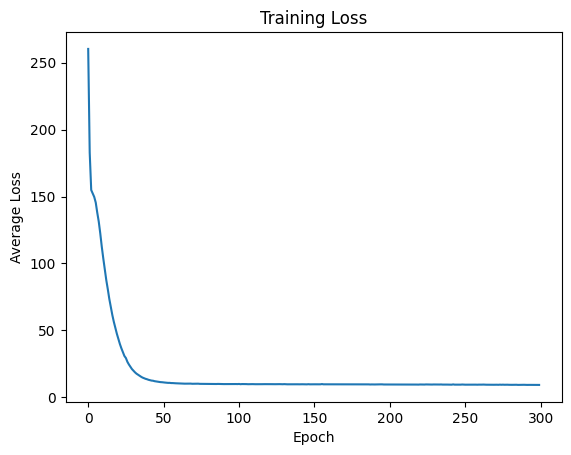

<ipython-input-129-35b43f6ccb82>:64: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  mean_control_variate =  integrate.quad(lambda x: density_function_times_H_tilde(x, model), -np.inf, np.inf,limit=100000)[0]


(10.926458057383842, 0.09326317806685058, 9.056664288972387)

In [ ]:
put_worst_numerical_integration_loc = Option_Price_Monte_Carlo_Estimator_with_control_variate_numerical_integration_loc(g_Z_loc,Z,K,r,T,M)
put_worst_numerical_integration_loc

## Analytic integration

In [ ]:
import scipy.stats as stats
def Option_2_layers_neural_network_loc(Z,f_Z,S0,K,r,T,M):
  Z_tr = torch.tensor(Z.reshape(M,-2), dtype=torch.float32)
  y_tr = torch.tensor(f_Z, dtype=torch.float32)
  dataset = TensorDataset(Z_tr, y_tr)
  batch_size = 64
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
  N = Z_tr.shape[1]
  model = nn.Sequential(
    nn.Linear(N, 5500),
    nn.ReLU(),
    nn.Linear(5500, 1)
  )
    # Use mean squared error loss
  criterion = nn.MSELoss()

  # Use Adam optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

  # Number of epochs
  epochs = 50

  # List to store average losses for each epoch
  avg_losses = []
  model.train()
  for epoch in range(epochs):
      epoch_losses = []  # List to store losses for this epoch

      for Z_batch, y_batch in dataloader:
          # Move the data to the GPU
          Z_batch, y_batch = Z_batch.to(device), y_batch.to(device)

          # Forward pass
          outputs = model(Z_batch)
          loss = criterion(outputs.squeeze(), y_batch)

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          # Store the loss for this batch
          epoch_losses.append(loss.item())

      # Compute the average loss for this epoch
      avg_loss = sum(epoch_losses) / len(epoch_losses)

      # Store the average loss for this epoch
      avg_losses.append(avg_loss)

      # Print the average loss for this epoch
      print(f'Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}')

  # After training, plot the average losses
  plt.plot(avg_losses)
  plt.xlabel('Epoch')
  plt.ylabel('Average Loss')
  plt.title('Training Loss')
  plt.show()
  H_Z = model(Z_tr).data.cpu().numpy().flatten()
  grouped_params = {}
  for name, param in model.named_parameters():
    grouped_params[name] = [param]
  W_1 = grouped_params['0.weight'][0].data.cpu().numpy()
  W_2 = grouped_params['2.weight'][0].data.cpu().numpy()
  b_1 = grouped_params['0.bias'][0].data.cpu().numpy()
  b_2 = grouped_params['2.bias'][0].data.cpu().numpy()
  mu = b_1
  sigma = np.sqrt(np.sum((W_1)**2, axis = 1))
  E_H_Z = W_2 @ ((sigma / (np.sqrt(2*np.pi))) * np.exp(-(1/2) * ((mu**2)/(sigma**2)) ) + mu * (1 - stats.norm.cdf(-mu / sigma))) + b_2
  #####

  new_payoff = f_Z - H_Z + E_H_Z
  C0 = np.exp(-r*T)*np.sum(new_payoff)/M
  sigma = np.sqrt( np.sum( (new_payoff - C0)**2) / (M-1) ) # standart deviation
  accuracy = sigma/np.sqrt(M)
  return C0,1.96*accuracy,sigma**2

Epoch 1/17, Average Loss: 381.5336795080276
Epoch 2/17, Average Loss: 189.83707391648065
Epoch 3/17, Average Loss: 104.33069289676727
Epoch 4/17, Average Loss: 64.81001054672967
Epoch 5/17, Average Loss: 40.9814630841452
Epoch 6/17, Average Loss: 25.5580629923987
Epoch 7/17, Average Loss: 14.10126306897118
Epoch 8/17, Average Loss: 7.058555111052498
Epoch 9/17, Average Loss: 2.809031318104456
Epoch 10/17, Average Loss: 1.2490237790440757
Epoch 11/17, Average Loss: 0.48559034391055034
Epoch 12/17, Average Loss: 0.22589684029420218
Epoch 13/17, Average Loss: 0.12717221216076896
Epoch 14/17, Average Loss: 0.08814446131388347
Epoch 15/17, Average Loss: 0.06633204133028076
Epoch 16/17, Average Loss: 0.0631983509612462
Epoch 17/17, Average Loss: 0.06555572979980046


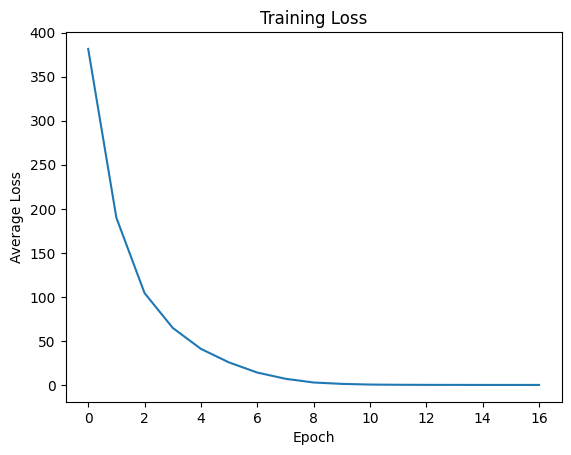

(9.466762565634568, 0.017306116868812813, 0.3118509798802659)

In [ ]:
call_basket_analytic_integration_loc = Option_2_layers_neural_network_loc(Z,f_Z_loc,S0,K,r,T,M)
call_basket_analytic_integration_loc

Epoch 1/17, Average Loss: 192.147277650379
Epoch 2/17, Average Loss: 45.8944147806319
Epoch 3/17, Average Loss: 19.601194396851554
Epoch 4/17, Average Loss: 11.477928948780846
Epoch 5/17, Average Loss: 7.017119328180949
Epoch 6/17, Average Loss: 4.190551523178343
Epoch 7/17, Average Loss: 2.3077436307119945
Epoch 8/17, Average Loss: 1.1022742683925326
Epoch 9/17, Average Loss: 0.5358379677174583
Epoch 10/17, Average Loss: 0.23906752762813416
Epoch 11/17, Average Loss: 0.12101097487741047
Epoch 12/17, Average Loss: 0.06391079085213798
Epoch 13/17, Average Loss: 0.040574884071709616
Epoch 14/17, Average Loss: 0.02943146379575843
Epoch 15/17, Average Loss: 0.027939255334555158
Epoch 16/17, Average Loss: 0.029241679428470512
Epoch 17/17, Average Loss: 0.03765124496486452


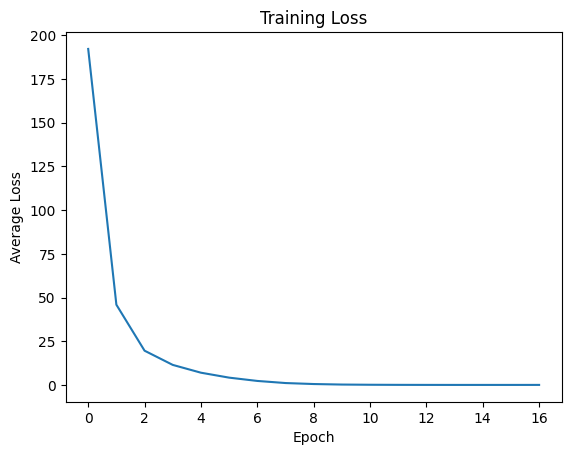

(10.595720812162124, 0.018038561651558968, 0.3388064415421635)

In [ ]:
put_worst_analytic_integration_loc = Option_2_layers_neural_network_loc(Z,g_Z_loc,S0,K,r,T,M)
put_worst_analytic_integration_loc

## Result

In [ ]:
import pandas as pd

# Assuming you have data for option C
data_C = {
    'Methode': ['Naive_monte_carlo','Numerical_integration','Analytic integration'],
    'Prix du call sur panier': [call_basket_naive_loc[0], call_basket_numerical_integration_loc[0], call_basket_analytic_integration_loc[0]],
    '+-1.96*Std/M Call': [call_basket_naive_loc[1], call_basket_numerical_integration_loc[1], call_basket_analytic_integration_loc[1]],
    'variance pour le call': [call_basket_naive_loc[2], call_basket_numerical_integration_loc[2], call_basket_analytic_integration_loc[2]],
    'Prix du put sur le pire': [put_worst_naive_loc[0], put_worst_numerical_integration_loc[0], put_worst_analytic_integration_loc[0]],
    '+-1.96*Std/M Put': [put_worst_naive_loc[1], put_worst_numerical_integration_loc[1], put_worst_analytic_integration_loc[1]],
    'variance pour le put': [put_worst_naive_loc[2], put_worst_numerical_integration_loc[2], put_worst_analytic_integration_loc[2]]
}

# Create a dataframe for option C
df_C = pd.DataFrame(data_C)

# Calculate the ratio between accuracies
df_C['Ratio variance Call'] =  call_basket_naive_loc[2]/df_C['variance pour le call']
df_C['Ratio variance Put'] = put_worst_naive_loc[2]/df_C['variance pour le put']

# Display the dataframe
display(df_C)


,Methode,Prix du call sur panier,+-1.96*Std/M Call,variance pour le call,Prix du put sur le pire,+-1.96*Std/M Put,variance pour le put,Ratio variance Call,Ratio variance Put
0,Naive_monte_carlo,8.505733,0.606843,383.442741,10.670737,0.387560,156.395782,1.000000,1.000000
1,Numerical_integration,9.193121,0.052689,2.890646,10.926458,0.093263,9.056664,132.649508,17.268586
2,Analytic integration,9.466763,0.017306,0.311851,10.595721,0.018039,0.338806,1229.570421,461.608053


In [ ]:
print(df_C)

                 Methode  Prix du call sur panier  +-1.96*Std/M Call  \
0      Naive_monte_carlo                 8.505733           0.606843   
1  Numerical_integration                 9.193121           0.052689   
2   Analytic integration                 9.466763           0.017306   

   variance pour le call  Prix du put sur le pire  +-1.96*Std/M Put  \
0             383.442741                10.670737          0.387560   
1               2.890646                10.926458          0.093263   
2               0.311851                10.595721          0.018039   

   variance pour le put  Ratio variance Call  Ratio variance Put  
0            156.395782             1.000000            1.000000  
1              9.056664           132.649508           17.268586  
2              0.338806          1229.570421          461.608053  


# Stochastic volatility

In [ ]:
# Parameters
# Matrice de corrélation
rho = np.full((nbsj, nbsj), rho)
np.fill_diagonal(rho, 1)

vi = 0.01  # Initial volatilities for two assets
kappa = 2  # Mean-reversion speed for two assets
ai = np.ones(nbsj)*0.04  # Long-term mean volatility for two assets
sigma0 = np.ones(nbsj)*0.04  # Volatility of volatility for two assets
gamma = -0.2

In [ ]:
# Function to generate correlated Brownian motions
def Z_normal_sample_sto(M, num_assets,n_steps):
    return np.random.normal(size=(M,2*num_assets,(n_steps+1)))

# Function to calculate the payoff of a call option on a basket
def f_payoff_call_on_a_basket_sto(Z, S0, K, T, r, rho, weights,vi, kappa, ai, sigma0, gamma, nbsj):
    num_steps = Z.shape[2]-1
    dt = T / num_steps
    RHO = np.block([[rho, gamma*rho], [gamma*rho, gamma**2 * rho + (1-gamma**2)*np.eye(nbsj)]])
    L = np.linalg.cholesky(RHO)
    ST = np.zeros((M,nbsj,(n_steps+1)))
    ST[:, :, 0] = S0
    sig = np.zeros_like(ST)  # Initialize v with the long-term variance
    sig[:, :, 0] = sigma0
    Z = np.einsum('ij, ljk->lik', L, Z)

    for i in range(1, num_steps+1):
        dW_S = Z[:, :nbsj, i-1] * np.sqrt(dt)
        dW_v = Z[:, nbsj:, i-1] * np.sqrt(dt)
        ST[:, :, i] = ST[:, :, i-1] * np.exp((r - 0.5 * sig[:, :, i-1]) * dt + np.sqrt(sig[:, :, i-1]) * dW_S)
        sig[:, :, i] = sig[:, :, i-1] + kappa * (ai[np.newaxis,:] - np.maximum(0, sig[:, :, i-1])) * dt + vi * np.sqrt(np.maximum(0, sig[:, :, i-1])) * dW_v

    ST_weighted_sum = np.sum(weights * ST[:,:,-1], axis=1)
    payoff = np.maximum(ST_weighted_sum - K, 0.0)
    return payoff


# Function to calculate the payoff of a put option on the worst performing asset
def g_payoff_put_on_a_worst_sto(Z, S0, K, T, r, rho,vi, kappa, ai, sigma0, gamma, nbsj):
    num_steps = Z.shape[2]-1
    dt = T / num_steps
    RHO = np.block([[rho, gamma*rho], [gamma*rho, gamma**2 * rho + (1-gamma**2)*np.eye(nbsj)]])
    L = np.linalg.cholesky(RHO)
    ST = np.zeros((M,nbsj,(n_steps+1)))
    ST[:, :, 0] = S0
    sig = np.zeros_like(ST)  # Initialize v with the long-term variance
    sig[:, :, 0] = sigma0
    Z = np.einsum('ij, ljk->lik', L, Z)

    for i in range(1, num_steps+1):
        dW_S = Z[:, :nbsj, i-1] * np.sqrt(dt)
        dW_v = Z[:, nbsj:, i-1] * np.sqrt(dt)
        ST[:, :, i] = ST[:, :, i-1] * np.exp((r - 0.5 * sig[:, :, i-1]) * dt + np.sqrt(sig[:, :, i-1]) * dW_S)
        sig[:, :, i] = sig[:, :, i-1] + kappa * (ai[np.newaxis,:] - np.maximum(0, sig[:, :, i-1])) * dt + vi * np.sqrt(np.maximum(0, sig[:, :, i-1])) * dW_v
    minST = np.min(ST[:,:,-1], axis=1)
    payoff = np.maximum(K - minST, 0.0)
    return payoff

In [ ]:
n_steps = 100
M = 1000
Z = Z_normal_sample_sto(M,nbsj , n_steps)
f_Z_sto = f_payoff_call_on_a_basket_sto(Z, S0, K, T, r, rho, weights,vi, kappa, ai, sigma0, gamma, nbsj)
f_Z_sto

array([ 0.        ,  5.12009378,  0.        ,  0.        ,  8.00229905,
        7.90781472,  1.15547229,  0.        ,  3.78909814,  0.        ,
        7.74711916, 34.4973138 ,  0.        , 32.4820357 ,  0.        ,
        9.73347367, 33.60552073, 24.03724505,  0.        ,  0.        ,
        0.        ,  7.49608002, 31.69492234,  0.        ,  0.        ,
       28.63111079,  6.68518584,  0.        , 19.80133135, 14.27281831,
        0.        ,  0.        , 35.58297662, 21.03011522,  1.04029253,
       40.82242044, 21.12732312,  0.        ,  0.        ,  0.        ,
        0.        ,  2.60265426, 17.20634765,  0.        ,  0.        ,
        5.05566649,  0.        ,  0.        ,  0.        , 13.78973153,
        0.        ,  0.        ,  0.        , 16.80133586,  0.        ,
        0.        , 14.60156275,  0.        ,  0.        ,  0.        ,
        5.95536364,  6.68695876,  6.63744373, 44.18635333, 16.8754013 ,
        0.        , 16.53198666, 16.42676914, 22.56328561,  0.  

In [ ]:
g_Z_sto = g_payoff_put_on_a_worst_sto(Z, S0, K, T, r, rho,vi, kappa, ai, sigma0, gamma, nbsj)
g_Z_sto

array([1.65495807e+01, 1.01279361e+01, 2.53200700e+01, 1.97726192e+01,
       1.15939969e+01, 7.45707364e+00, 1.07616876e+01, 3.27265620e+01,
       1.10416566e+01, 1.93935184e+01, 1.42814917e+01, 0.00000000e+00,
       2.58031646e+01, 0.00000000e+00, 2.29484939e+01, 4.00363650e+00,
       0.00000000e+00, 0.00000000e+00, 1.32657315e+01, 2.21120876e+01,
       3.50142627e+01, 1.27806047e+01, 0.00000000e+00, 1.64725021e+01,
       1.19128460e+01, 0.00000000e+00, 1.05159350e+01, 1.52424327e+01,
       0.00000000e+00, 0.00000000e+00, 1.75790345e+01, 3.12101983e+01,
       0.00000000e+00, 0.00000000e+00, 1.09760352e+01, 0.00000000e+00,
       0.00000000e+00, 4.01353168e+01, 3.19162513e+01, 1.91237427e+01,
       1.63941922e+01, 1.22054892e+01, 0.00000000e+00, 2.37418012e+01,
       3.19076628e+01, 1.21750638e+01, 2.94545005e+01, 4.31720257e+01,
       3.07154436e+01, 4.98598878e+00, 1.83919918e+01, 3.12613919e+01,
       2.05598099e+01, 0.00000000e+00, 2.90948911e+01, 2.83530821e+01,
      

## Naive Monte carlo

In [ ]:
call_basket_naive_sto = black_scholes_Monte_Carlo_option(f_Z_sto,r,T,M)
call_basket_naive_sto

(9.30989298197515, 0.8507976539190355, 188.4258246340418)

In [ ]:
put_worst_naive_sto = black_scholes_Monte_Carlo_option(g_Z_sto,r,T,M)
put_worst_naive_sto

(12.836192148635167, 0.7323509584974254, 139.61316285196213)

## Numerical integration

Epoch 1/200, Average Loss: 212.86059284210205
Epoch 2/200, Average Loss: 187.79469871520996
Epoch 3/200, Average Loss: 186.8780598640442
Epoch 4/200, Average Loss: 182.2033805847168
Epoch 5/200, Average Loss: 176.37624549865723
Epoch 6/200, Average Loss: 171.0917158126831
Epoch 7/200, Average Loss: 162.86359024047852
Epoch 8/200, Average Loss: 146.42519426345825
Epoch 9/200, Average Loss: 134.102614402771
Epoch 10/200, Average Loss: 120.50766324996948
Epoch 11/200, Average Loss: 109.52003288269043
Epoch 12/200, Average Loss: 100.76765155792236
Epoch 13/200, Average Loss: 92.16238069534302
Epoch 14/200, Average Loss: 84.62752842903137
Epoch 15/200, Average Loss: 76.38613319396973
Epoch 16/200, Average Loss: 70.24384784698486
Epoch 17/200, Average Loss: 64.53986978530884
Epoch 18/200, Average Loss: 56.871384620666504
Epoch 19/200, Average Loss: 50.50160849094391
Epoch 20/200, Average Loss: 44.85874819755554
Epoch 21/200, Average Loss: 39.240925788879395
Epoch 22/200, Average Loss: 33.997

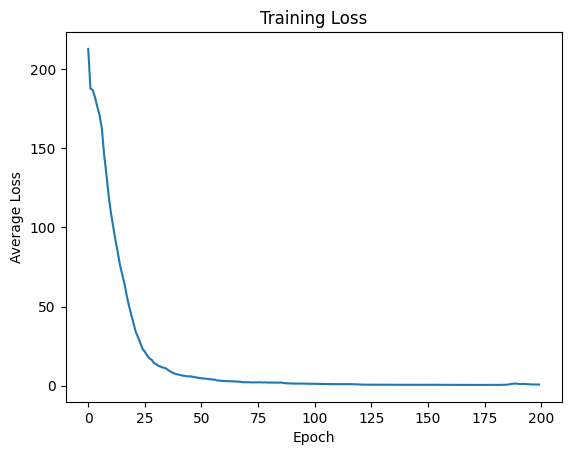

<ipython-input-50-d0604ef4fe0a>:64: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  mean_control_variate =  integrate.quad(lambda x: density_function_times_H_tilde(x, model), -np.inf, np.inf,limit=1000000)[0]


(9.009555068555729, 0.053281193738106386, 0.7389852160968419)

In [ ]:
call_basket_numerical_integration_sto = Option_Price_Monte_Carlo_Estimator_with_control_variate_numerical_integration_loc(f_Z_sto,Z,K,r,T,M)
call_basket_numerical_integration_sto

Epoch 1/200, Average Loss: 190.45789098739624
Epoch 2/200, Average Loss: 145.62799835205078
Epoch 3/200, Average Loss: 138.60787439346313
Epoch 4/200, Average Loss: 135.24189043045044
Epoch 5/200, Average Loss: 130.9338035583496
Epoch 6/200, Average Loss: 128.26564598083496
Epoch 7/200, Average Loss: 121.0209550857544
Epoch 8/200, Average Loss: 114.68478107452393
Epoch 9/200, Average Loss: 108.91397857666016
Epoch 10/200, Average Loss: 100.98589658737183
Epoch 11/200, Average Loss: 92.16874265670776
Epoch 12/200, Average Loss: 85.4552857875824
Epoch 13/200, Average Loss: 77.78743529319763
Epoch 14/200, Average Loss: 70.96920776367188
Epoch 15/200, Average Loss: 62.51627230644226
Epoch 16/200, Average Loss: 56.04086494445801
Epoch 17/200, Average Loss: 49.50789189338684
Epoch 18/200, Average Loss: 43.80391812324524
Epoch 19/200, Average Loss: 38.44275915622711
Epoch 20/200, Average Loss: 32.86237573623657
Epoch 21/200, Average Loss: 28.497923612594604
Epoch 22/200, Average Loss: 24.4095

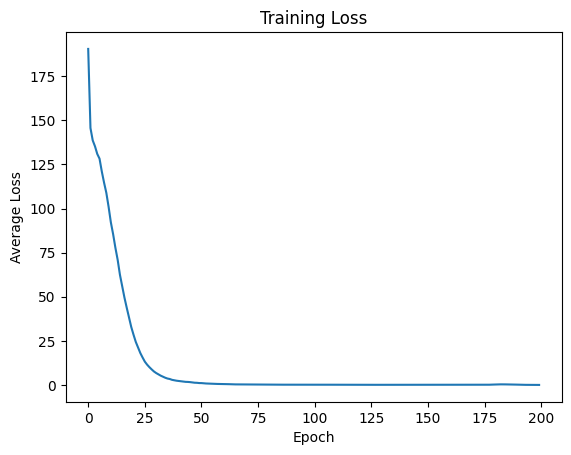

<ipython-input-50-d0604ef4fe0a>:64: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  mean_control_variate =  integrate.quad(lambda x: density_function_times_H_tilde(x, model), -np.inf, np.inf,limit=1000000)[0]


(11.379632564632677, 0.03737931175811841, 0.36370599424995026)

In [ ]:
put_worst_numerical_integration_sto = Option_Price_Monte_Carlo_Estimator_with_control_variate_numerical_integration_loc(g_Z_sto,Z,K,r,T,M)
put_worst_numerical_integration_sto

## Analytic integration

Epoch 1/50, Average Loss: 258.401611328125
Epoch 2/50, Average Loss: 194.42000150680542
Epoch 3/50, Average Loss: 155.7670316696167
Epoch 4/50, Average Loss: 124.41515350341797
Epoch 5/50, Average Loss: 96.62092542648315
Epoch 6/50, Average Loss: 73.27229571342468
Epoch 7/50, Average Loss: 53.286376953125
Epoch 8/50, Average Loss: 36.474236607551575
Epoch 9/50, Average Loss: 23.516516089439392
Epoch 10/50, Average Loss: 14.206084370613098
Epoch 11/50, Average Loss: 8.15113878250122
Epoch 12/50, Average Loss: 4.656724855303764
Epoch 13/50, Average Loss: 2.6003558188676834
Epoch 14/50, Average Loss: 1.426017191261053
Epoch 15/50, Average Loss: 0.7893505971878767
Epoch 16/50, Average Loss: 0.4204374458640814
Epoch 17/50, Average Loss: 0.22128922399133444
Epoch 18/50, Average Loss: 0.1210009129717946
Epoch 19/50, Average Loss: 0.0638715187087655
Epoch 20/50, Average Loss: 0.032724127755500376
Epoch 21/50, Average Loss: 0.016695596103090793
Epoch 22/50, Average Loss: 0.008391415438381955
Ep

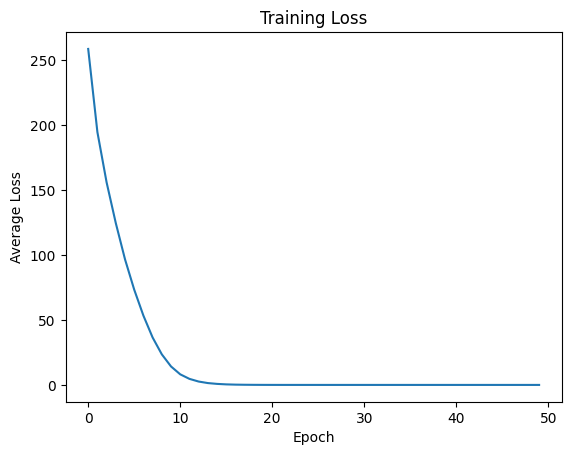

(8.47773668112378, 0.026954163287326565, 0.1891209179820552)

In [ ]:
call_basket_analytic_integration_sto = Option_2_layers_neural_network_loc(Z,f_Z_sto,S0,K,r,T,M)

call_basket_analytic_integration_sto

In [ ]:
put_worst_analytic_integration_sto = Option_2_layers_neural_network_loc(Z,g_Z_sto,S0,K,r,T,M)
put_worst_analytic_integration_sto

In [ ]:
import pandas as pd

# Assuming you have data for option C
data_C = {
    'Methode': ['Naive_monte_carlo_sto', 'Numerical_integration_sto', 'Analytic_integration_sto'],
    'Prix du call sur panier': [call_basket_naive_sto[0], call_basket_numerical_integration_sto[0], call_basket_analytic_integration_sto[0]],
    '+-1.96*Std/M Call': [call_basket_naive_sto[1], call_basket_numerical_integration_sto[1], call_basket_analytic_integration_sto[1]],
    'variance pour le call': [call_basket_naive_sto[2], call_basket_numerical_integration_sto[2], call_basket_analytic_integration_sto[2]],
    'Prix du put sur le pire': [put_worst_naive_sto[0], put_worst_numerical_integration_sto[0], put_worst_analytic_integration_sto[0]],
    '+-1.96*Std/M Put': [put_worst_naive_sto[1], put_worst_numerical_integration_sto[1], put_worst_analytic_integration_sto[1]],
    'variance pour le put': [put_worst_naive_sto[2], put_worst_numerical_integration_sto[2], put_worst_analytic_integration_sto[2]]
}

# Create a dataframe for option C
df_C = pd.DataFrame(data_C)

# Calculate the ratio between accuracies
df_C['Ratio variance Call'] = call_basket_naive_sto[2] / df_C['variance pour le call']
df_C['Ratio variance Put'] = put_worst_naive_sto[2] / df_C['variance pour le put']

# Display the dataframe
display(df_C)
